<a href="https://colab.research.google.com/github/Morsalah/OULAD-StudentWithdrawalPrediction-FinalProject/blob/main/FinalProject%7CEDALevel0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Database schema

In [26]:
import pandas as pd

Courses = pd.read_csv('courses.csv')
Assessments = pd.read_csv('assessments.csv')
Vle = pd.read_csv('vle.csv')

StudentInfo = pd.read_csv('studentInfo.csv')

StudentAssessment = pd.read_csv('studentAssessment.csv')
StudentRegistration= pd.read_csv('studentRegistration.csv')
StudentVle= pd.read_csv('studentVle.csv')

# Create the dictionary
University_Learning_Analytics_datasetData = {
    'Courses': Courses,
    'Assessments': Assessments,
    'Vle': Vle,
    'StudentInfo': StudentInfo,
    'StudentAssessment': StudentAssessment,
    'StudentRegistration': StudentRegistration,
    'StudentVle': StudentVle
                                              }


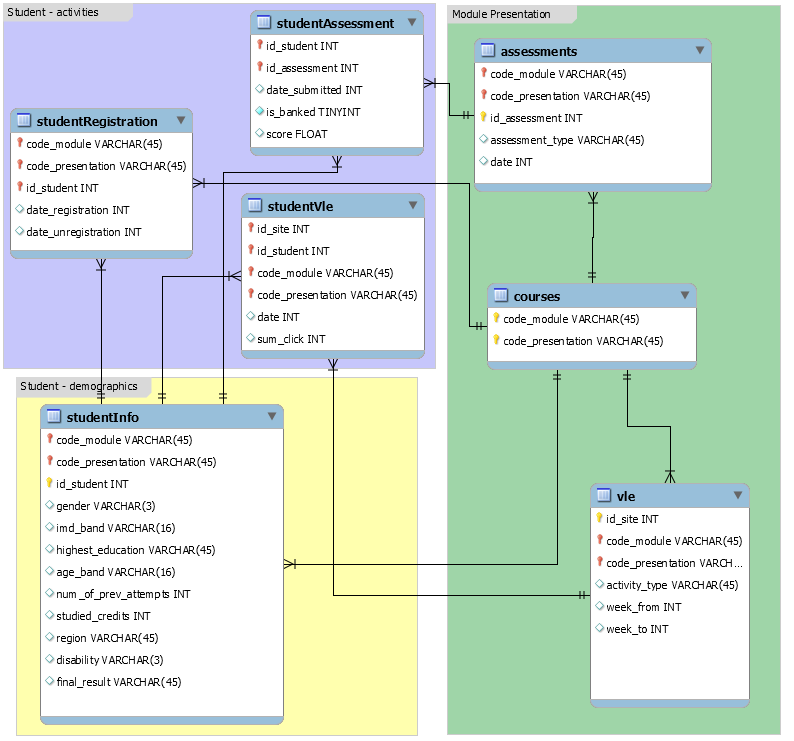

# EDA Level 0 Functions

In [27]:
def DataShape(dataframe):
    return {'Rows': [dataframe.shape[0]], 'Columns': [dataframe.shape[1]]}

In [28]:
def DistinctValue(dataframe):
    features = []
    distinct_counts = []
    distinct_values = []

    for col in dataframe.columns:
        if dataframe[col].dtypes == 'object':
            features.append(col)
            distinct_counts.append(dataframe[col].nunique())
            distinct_values.append(list(dataframe[col].unique()))

    DistinctValue = pd.DataFrame({
                            'Features': features,
                            'Distinct Value Count': distinct_counts,
                            'Distinct Values': distinct_values
                            })

    return DistinctValue

In [29]:
def MissingValues(dataframe):
    features = []
    data_types = []
    null_counts = []
    null_percentages = []

    for col in dataframe.columns:
        features.append(col)
        data_types.append(dataframe[col].dtypes)
        null_counts.append(dataframe[col].isnull().sum())
        null_percentages.append(dataframe[col].isnull().sum() / dataframe.shape[0] * 100)

    MissingValues = pd.DataFrame({
        'Features': features,
        'Data Type': data_types,
        'Missing Values': null_counts,
        'Percentage Missing Values': null_percentages
                                 })

    return MissingValues

In [30]:
import pandas as pd

def Duplicates(dataframe, drop=False):
    duplicates = dataframe[dataframe.duplicated()]

    if not duplicates.empty:
        print(f"Found {duplicates.shape[0]} duplicate rows.")
    else:
        print("No duplicate rows found.")

    if drop:
        data = dataframe.drop_duplicates()
        return duplicates, data
    else:
        return duplicates


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# add an explanation of the function

def DistributionPlot(data):
    sns.set(style="whitegrid")

    for feature in data.columns:
        plt.figure(figsize=(10, 6))
        if data[feature].dtype == 'object' or data[feature].dtype.name == 'category':
            # Use seaborn's barplot for string data
            sns.countplot(data=data, x=feature, palette='husl', hue=data[feature], legend=False)
            plt.title(f'{feature} Distribution')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.xticks(rotation=45)

        elif np.issubdtype(data[feature].dtype, np.number):
            # Use seaborn's histplot for numerical data
            sns.histplot(data[feature], bins=30, kde=True, color='blue')
            plt.title(f'{feature} Distribution')
            plt.xlabel(feature)
            plt.ylabel('Frequency')

        plt.show()


# Module Presentation Database

**Courses**

In [7]:
display(Courses.head())

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
Courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   code_module                 22 non-null     category
 1   code_presentation           22 non-null     category
 2   module_presentation_length  22 non-null     int16   
dtypes: category(2), int16(1)
memory usage: 776.0 bytes


**Assessments**

In [12]:
display(Assessments.head())

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [14]:
Assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   code_module        206 non-null    category
 1   code_presentation  206 non-null    category
 2   id_assessment      206 non-null    int32   
 3   assessment_type    206 non-null    category
 4   date               195 non-null    float16 
 5   weight             206 non-null    float16 
dtypes: category(3), float16(2), int32(1)
memory usage: 3.0 KB


**Vle**

In [16]:
display(Vle.head())

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [18]:
Vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id_site            6364 non-null   int32   
 1   code_module        6364 non-null   category
 2   code_presentation  6364 non-null   category
 3   activity_type      6364 non-null   category
 4   week_from          1121 non-null   float16 
 5   week_to            1121 non-null   float16 
dtypes: category(3), float16(2), int32(1)
memory usage: 69.7 KB


# Student Demographics Database

**StudentInfo**

In [ ]:
display(StudentInfo.head())

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
StudentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code_module           32593 non-null  category
 1   code_presentation     32593 non-null  category
 2   id_student            32593 non-null  int32   
 3   gender                32593 non-null  object  
 4   region                32593 non-null  object  
 5   highest_education     32593 non-null  object  
 6   imd_band              31482 non-null  object  
 7   age_band              32593 non-null  object  
 8   num_of_prev_attempts  32593 non-null  int16   
 9   studied_credits       32593 non-null  int16   
 10  disability            32593 non-null  object  
 11  final_result          32593 non-null  object  
dtypes: category(2), int16(2), int32(1), object(7)
memory usage: 2.1+ MB


# Student Activities Database

**StudentAssessment**


In [ ]:
display(StudentAssessment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int32  
 1   id_student      173912 non-null  int32  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int32(2), int64(2)
memory usage: 5.3 MB


None

**StudentRegistration**

In [ ]:
display(StudentRegistration.head())

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
StudentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   code_module          32593 non-null  category
 1   code_presentation    32593 non-null  category
 2   id_student           32593 non-null  int32   
 3   date_registration    32548 non-null  float64 
 4   date_unregistration  10072 non-null  float64 
dtypes: category(2), float64(2), int32(1)
memory usage: 700.9 KB


**StudentVle**

In [24]:
display(StudentVle.head())

NameError: name 'StudentVle' is not defined

In [ ]:
StudentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype   
---  ------             -----   
 0   code_module        category
 1   code_presentation  category
 2   id_student         int32   
 3   id_site            int32   
 4   date               int16   
 5   sum_click          int16   
dtypes: category(2), int16(2), int32(2)
memory usage: 142.3 MB


# EDA Level 0

In [33]:
for table_name,data in University_Learning_Analytics_datasetData.items():
  print(f"Table: {table_name}")
  display(DataShape(data))
  print()
  display(DistinctValue(data))
  print()
  display(MissingValues(data))
  print()
  display(Duplicates(data, drop=False))
  file_name = f"{table_name}_cleaned.csv"
  data.to_csv(file_name, index=False)

Table: Courses


{'Rows': [22], 'Columns': [3]}

,Features,Distinct Value Count,Distinct Values
0,code_module,7,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"
1,code_presentation,4,"[2013J, 2014J, 2013B, 2014B]"


,Features,Data Type,Missing Values,Percentage Missing Values
0,code_module,object,0,0.0
1,code_presentation,object,0,0.0
2,module_presentation_length,int64,0,0.0



No duplicate rows found.


,code_module,code_presentation,module_presentation_length


Table: Assessments


{'Rows': [206], 'Columns': [6]}

,Features,Distinct Value Count,Distinct Values
0,code_module,7,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"
1,code_presentation,4,"[2013J, 2014J, 2013B, 2014B]"
2,assessment_type,3,"[TMA, Exam, CMA]"


,Features,Data Type,Missing Values,Percentage Missing Values
0,code_module,object,0,0.000000
1,code_presentation,object,0,0.000000
2,id_assessment,int64,0,0.000000
3,assessment_type,object,0,0.000000
4,date,float64,11,5.339806
5,weight,float64,0,0.000000



No duplicate rows found.


,code_module,code_presentation,id_assessment,assessment_type,date,weight


Table: Vle


{'Rows': [6364], 'Columns': [6]}

,Features,Distinct Value Count,Distinct Values
0,code_module,7,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"
1,code_presentation,4,"[2013J, 2014J, 2013B, 2014B]"
2,activity_type,20,"[resource, oucontent, url, homepage, subpage, ..."


,Features,Data Type,Missing Values,Percentage Missing Values
0,id_site,int64,0,0.000000
1,code_module,object,0,0.000000
2,code_presentation,object,0,0.000000
3,activity_type,object,0,0.000000
4,week_from,float64,5243,82.385292
5,week_to,float64,5243,82.385292



No duplicate rows found.


,id_site,code_module,code_presentation,activity_type,week_from,week_to


Table: StudentInfo


{'Rows': [32593], 'Columns': [12]}

,Features,Distinct Value Count,Distinct Values
0,code_module,7,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"
1,code_presentation,4,"[2013J, 2014J, 2013B, 2014B]"
2,gender,2,"[M, F]"
3,region,13,"[East Anglian Region, Scotland, North Western ..."
4,highest_education,5,"[HE Qualification, A Level or Equivalent, Lowe..."
5,imd_band,10,"[90-100%, 20-30%, 30-40%, 50-60%, 80-90%, 70-8..."
6,age_band,3,"[55<=, 35-55, 0-35]"
7,disability,2,"[N, Y]"
8,final_result,4,"[Pass, Withdrawn, Fail, Distinction]"


,Features,Data Type,Missing Values,Percentage Missing Values
0,code_module,object,0,0.000000
1,code_presentation,object,0,0.000000
2,id_student,int64,0,0.000000
3,gender,object,0,0.000000
4,region,object,0,0.000000
5,highest_education,object,0,0.000000
6,imd_band,object,1111,3.408707
7,age_band,object,0,0.000000
8,num_of_prev_attempts,int64,0,0.000000
9,studied_credits,int64,0,0.000000



No duplicate rows found.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result


Table: StudentAssessment


{'Rows': [173912], 'Columns': [5]}

,Features,Distinct Value Count,Distinct Values


,Features,Data Type,Missing Values,Percentage Missing Values
0,id_assessment,int64,0,0.000000
1,id_student,int64,0,0.000000
2,date_submitted,int64,0,0.000000
3,is_banked,int64,0,0.000000
4,score,float64,173,0.099476



No duplicate rows found.


,id_assessment,id_student,date_submitted,is_banked,score


Table: StudentRegistration


{'Rows': [32593], 'Columns': [5]}

,Features,Distinct Value Count,Distinct Values
0,code_module,7,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"
1,code_presentation,4,"[2013J, 2014J, 2013B, 2014B]"


,Features,Data Type,Missing Values,Percentage Missing Values
0,code_module,object,0,0.000000
1,code_presentation,object,0,0.000000
2,id_student,int64,0,0.000000
3,date_registration,float64,45,0.138066
4,date_unregistration,float64,22521,69.097659



No duplicate rows found.


,code_module,code_presentation,id_student,date_registration,date_unregistration


Table: StudentVle


{'Rows': [10655280], 'Columns': [6]}

,Features,Distinct Value Count,Distinct Values
0,code_module,7,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"
1,code_presentation,4,"[2013J, 2014J, 2013B, 2014B]"


,Features,Data Type,Missing Values,Percentage Missing Values
0,code_module,object,0,0.0
1,code_presentation,object,0,0.0
2,id_student,int64,0,0.0
3,id_site,int64,0,0.0
4,date,int64,0,0.0
5,sum_click,int64,0,0.0



Found 787170 duplicate rows.


,code_module,code_presentation,id_student,id_site,date,sum_click
2,AAA,2013J,28400,546652,-10,1
63,AAA,2013J,45462,546652,-10,1
180,AAA,2013J,77367,546652,-10,4
193,AAA,2013J,94961,546652,-10,2
442,AAA,2013J,248270,546652,-10,4
...,...,...,...,...,...,...
10655235,GGG,2014J,686194,897083,267,1
10655250,GGG,2014J,676071,896939,268,1
10655256,GGG,2014J,642905,896939,268,2
10655261,GGG,2014J,625530,896939,269,1


Table: Courses



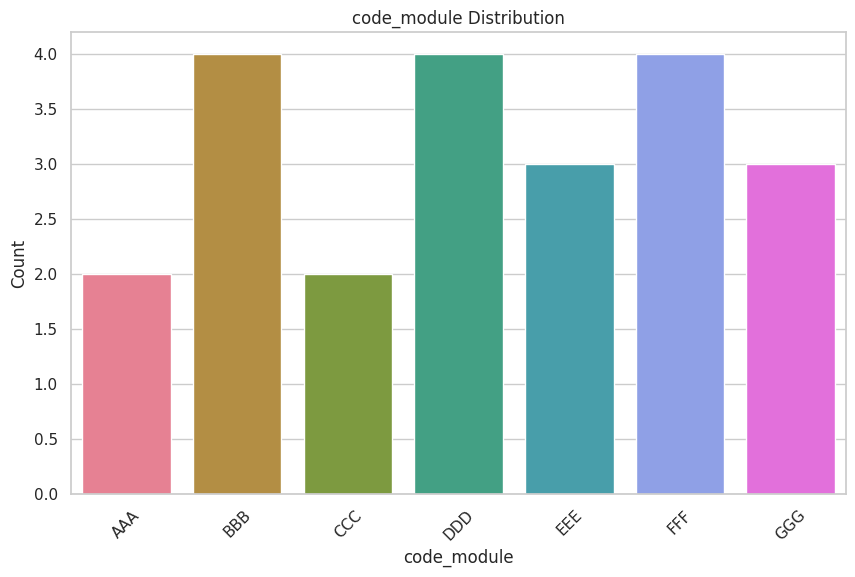

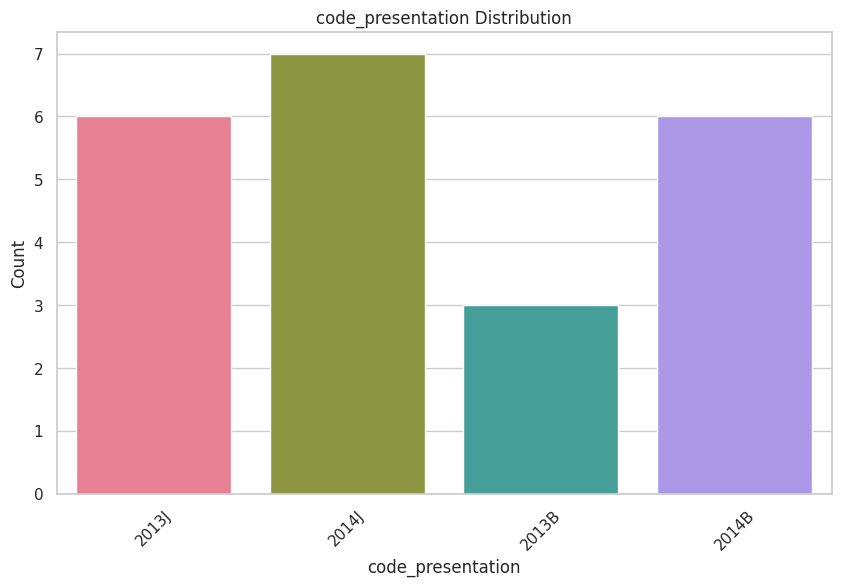

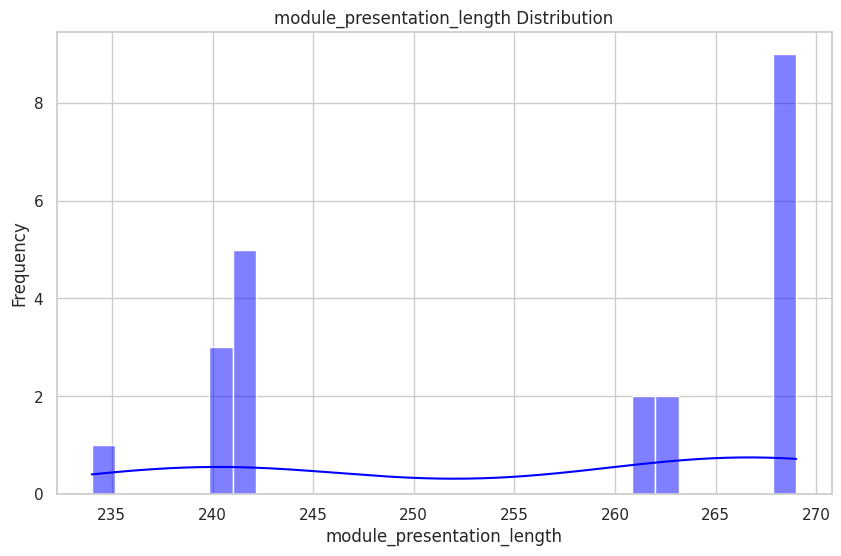

Table: Assessments



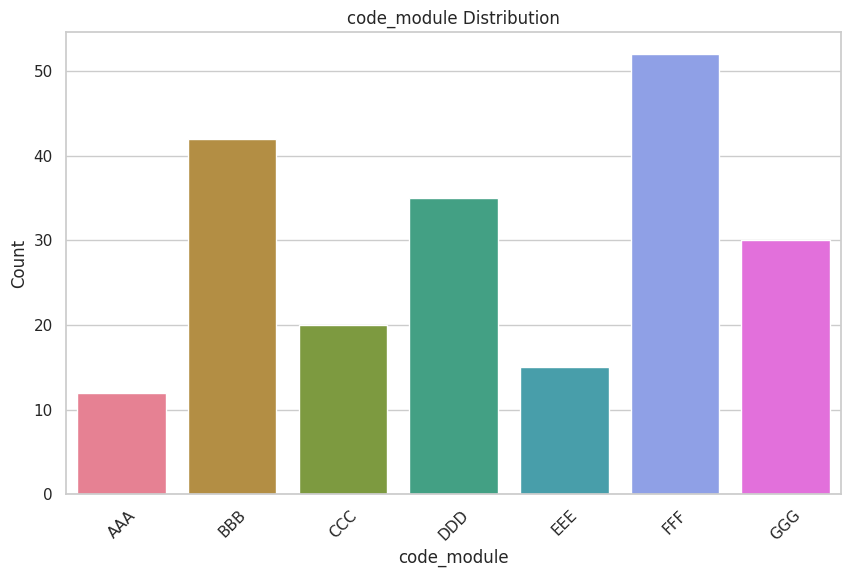

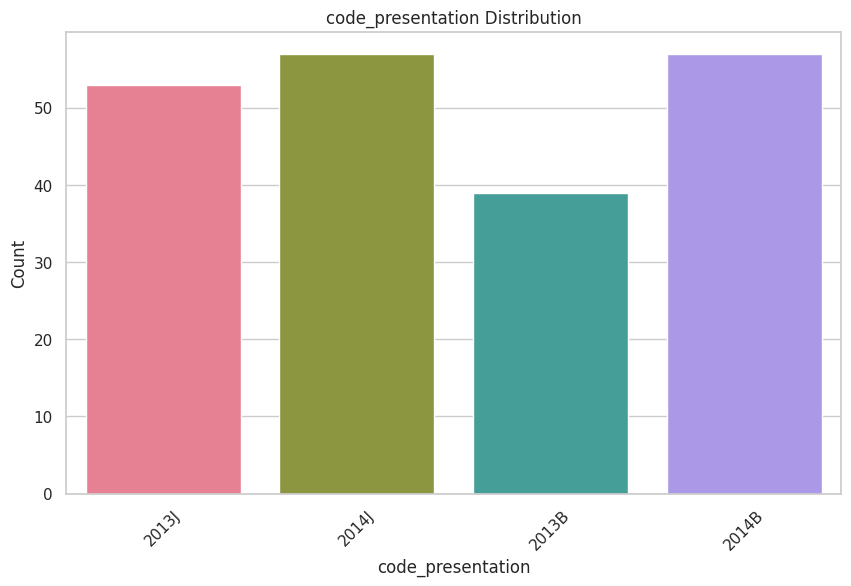

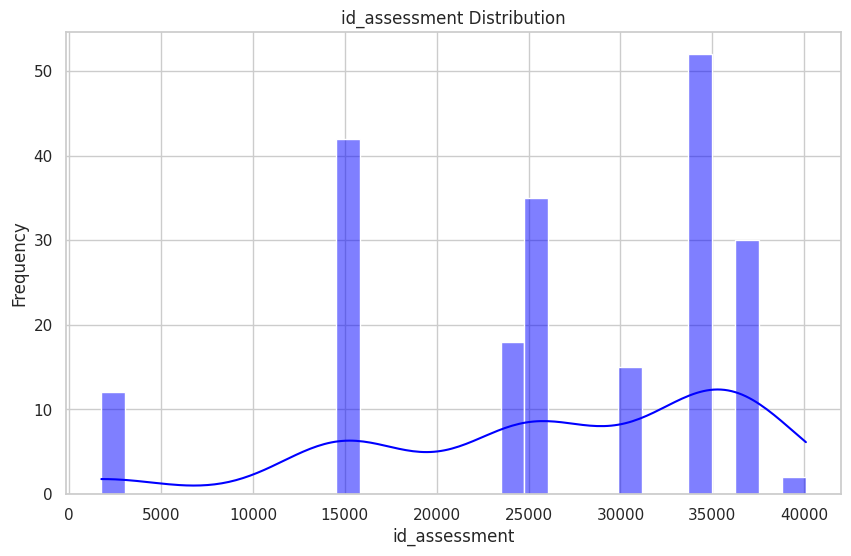

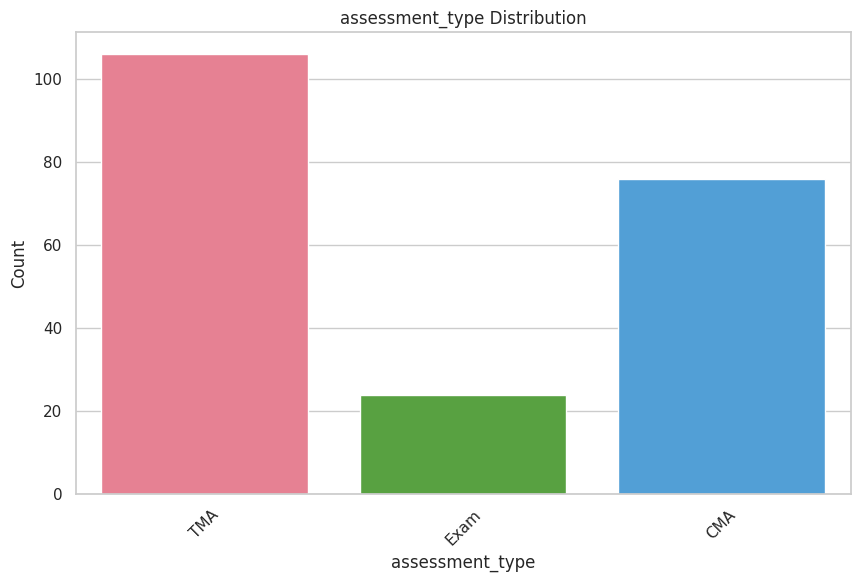

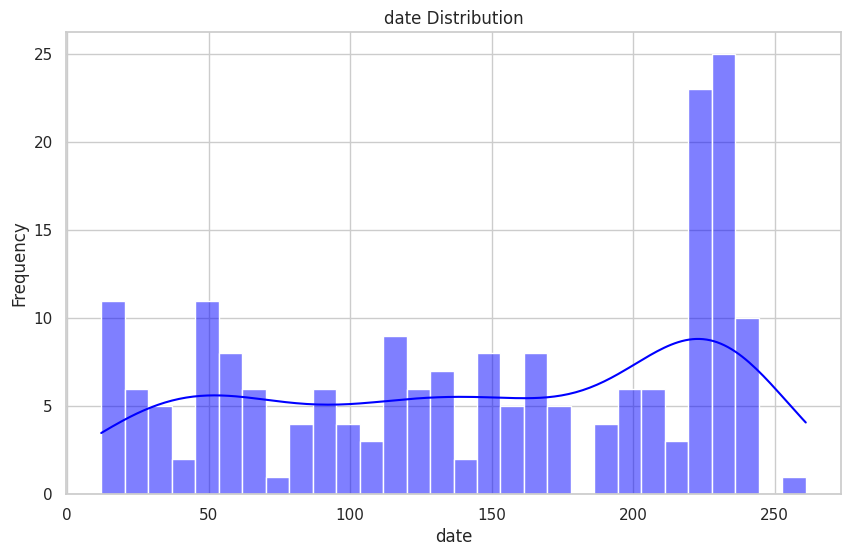

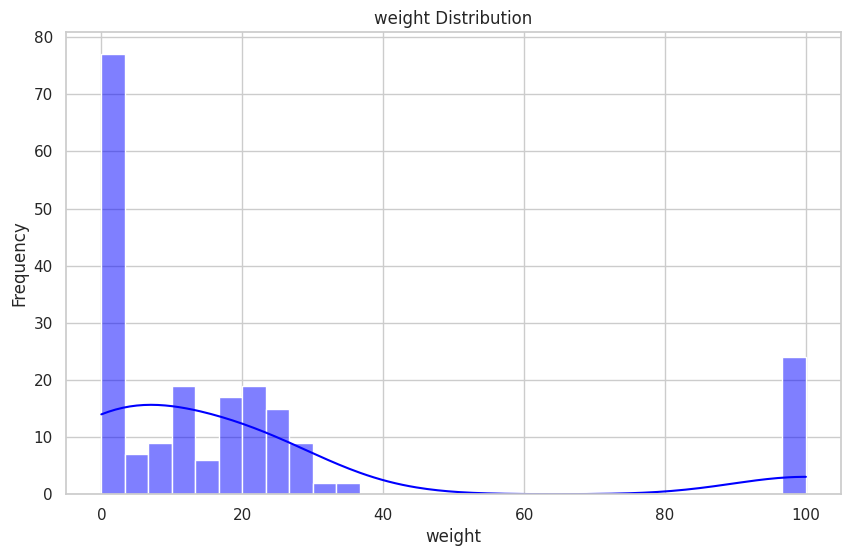

Table: Vle



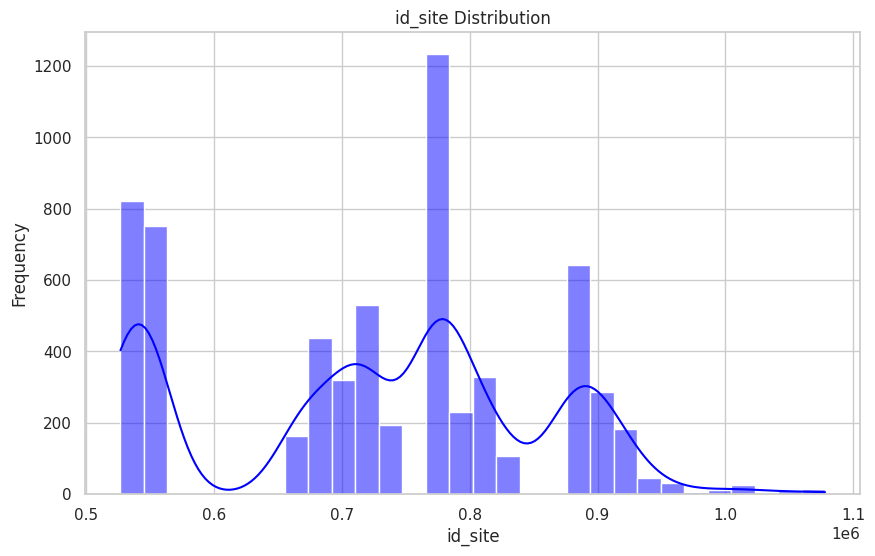

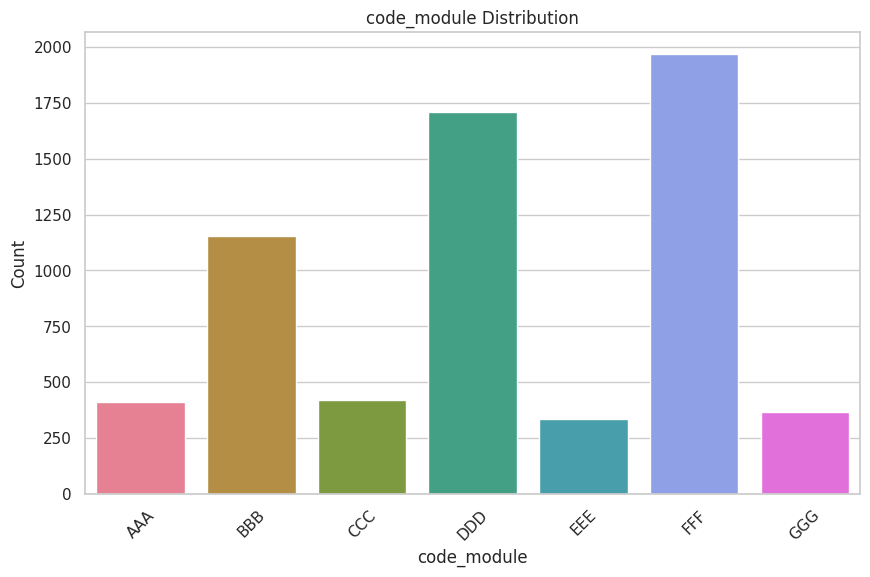

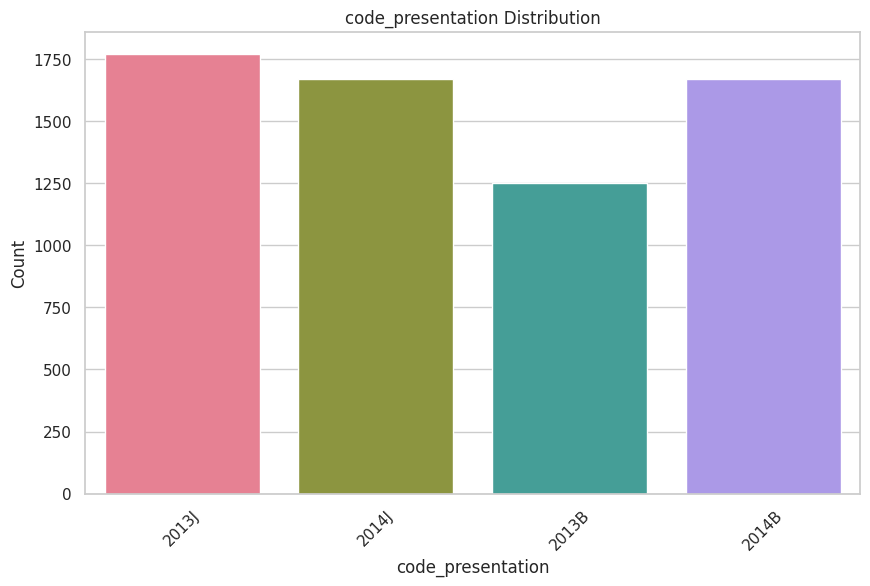

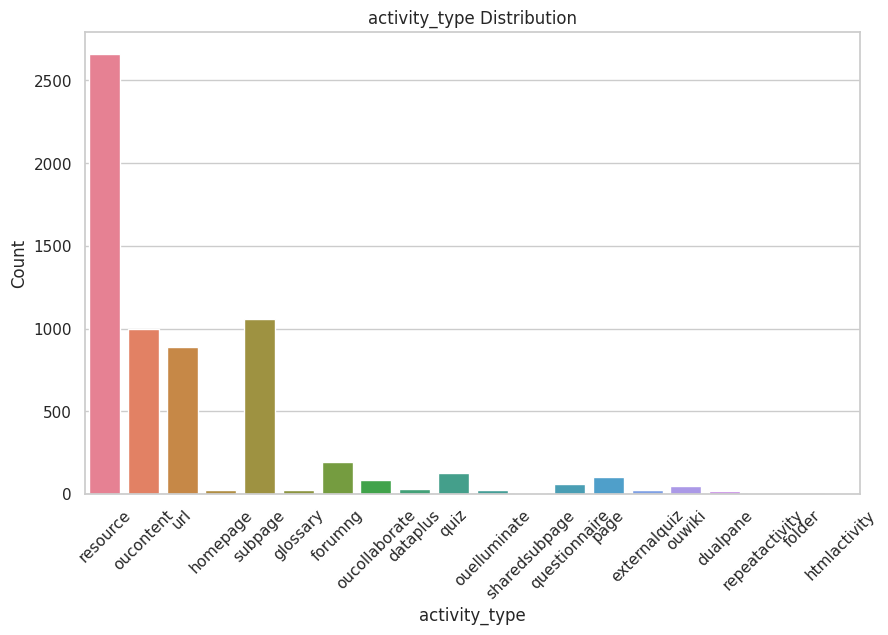

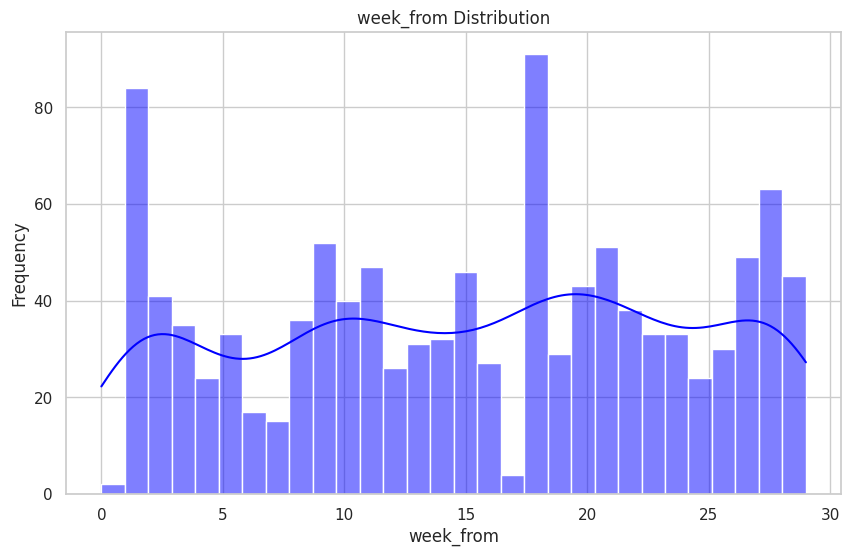

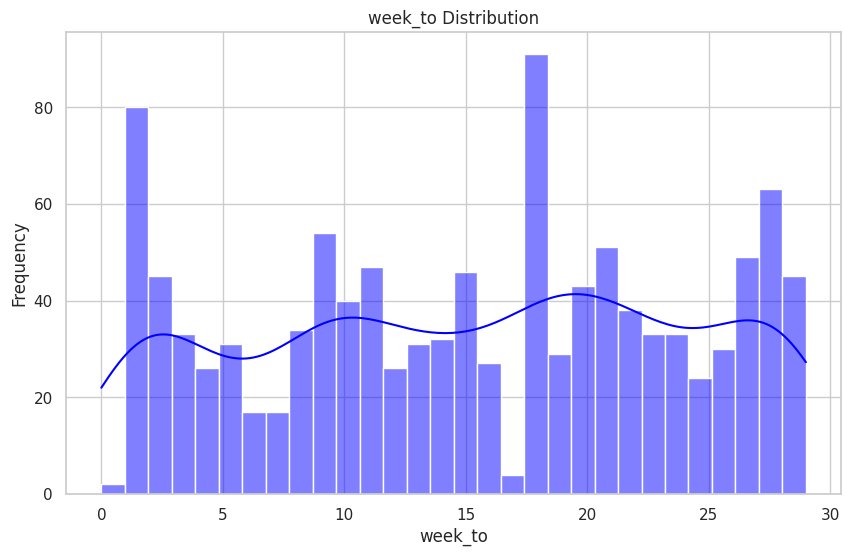

Table: StudentInfo



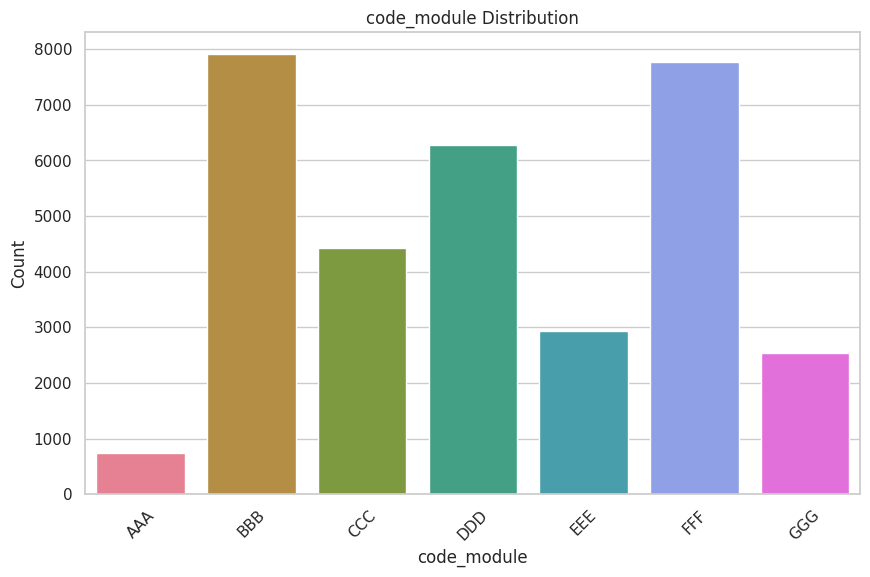

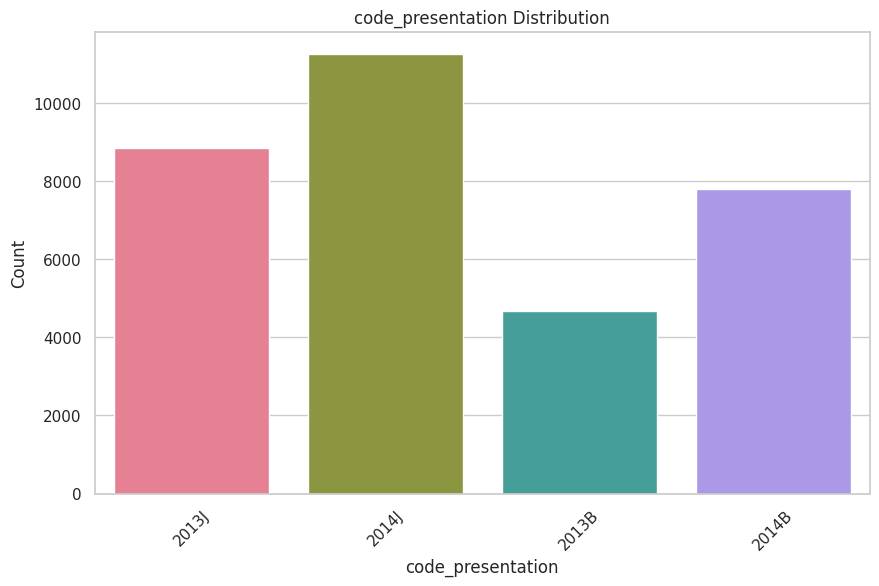

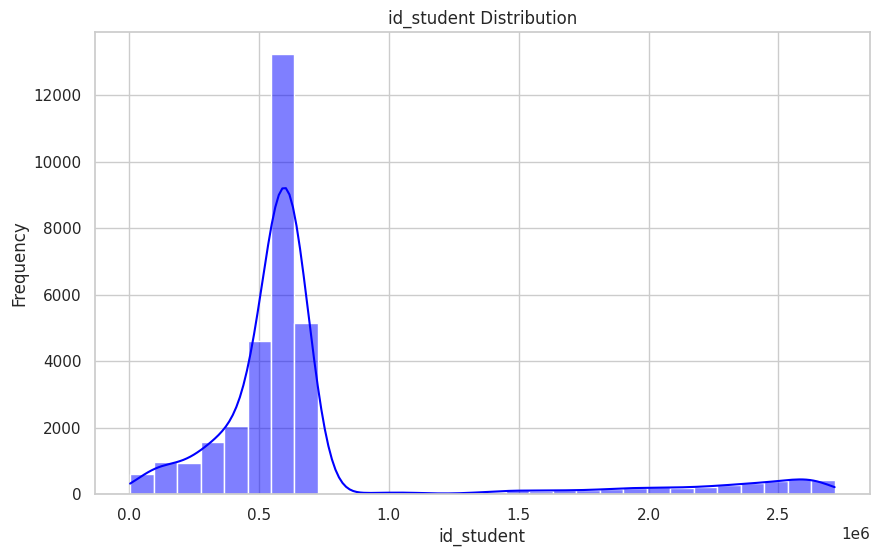

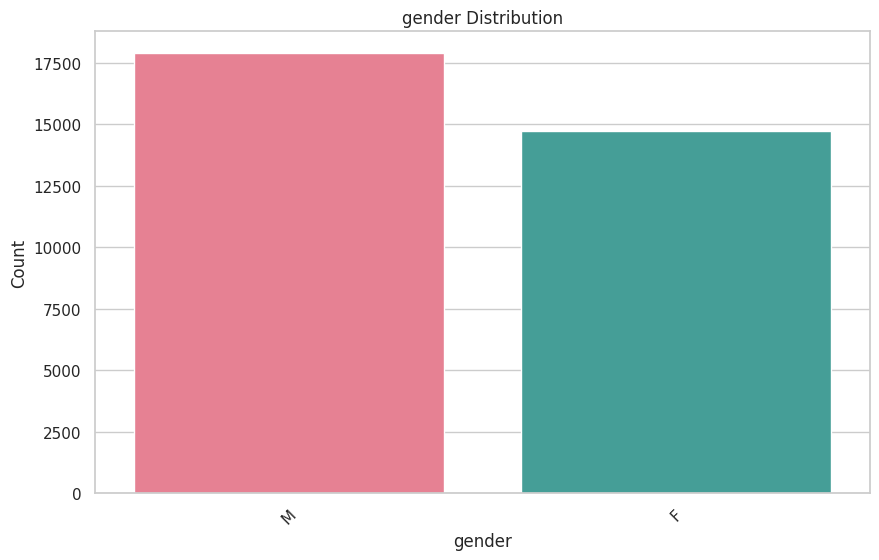

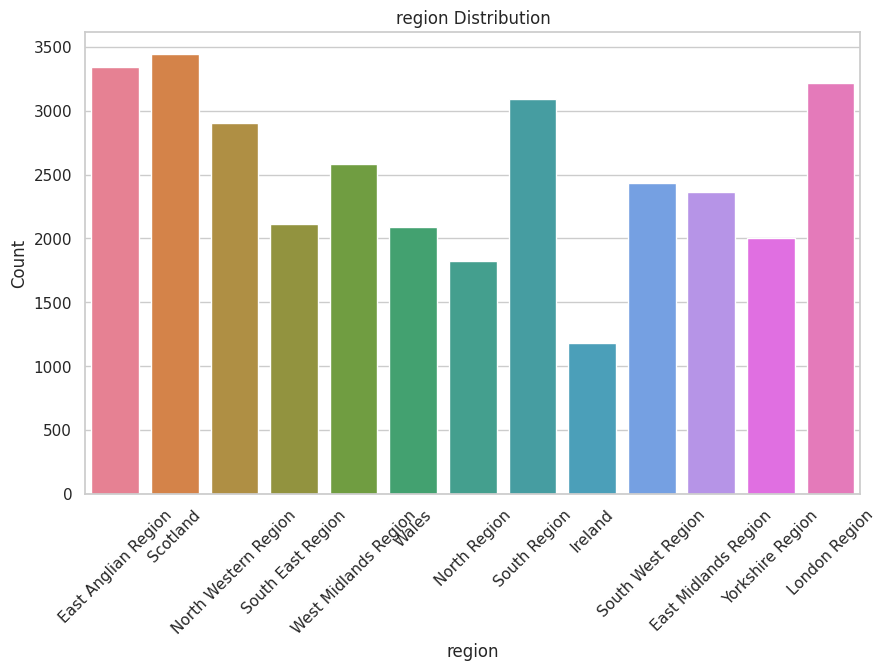

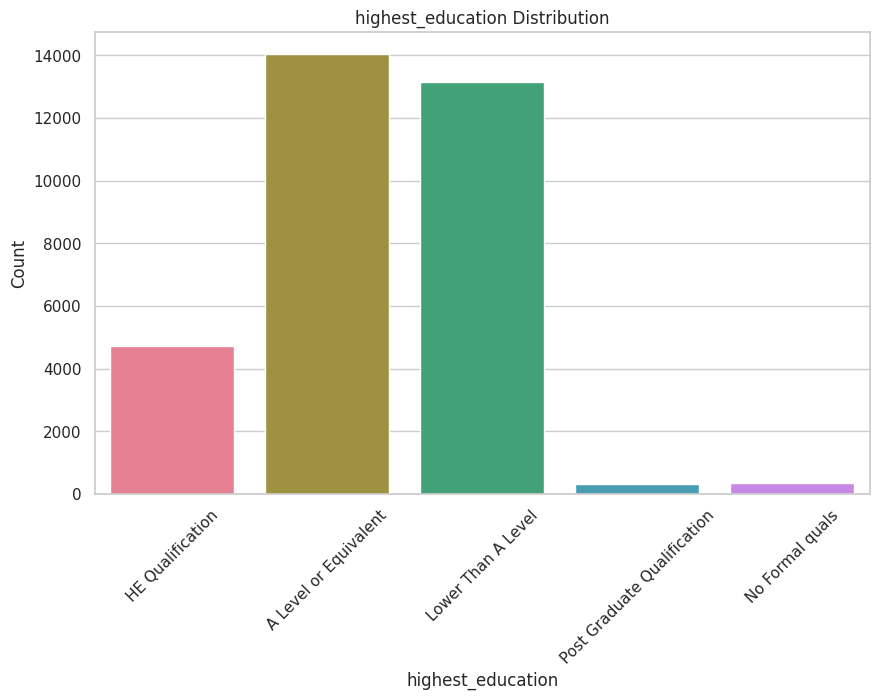

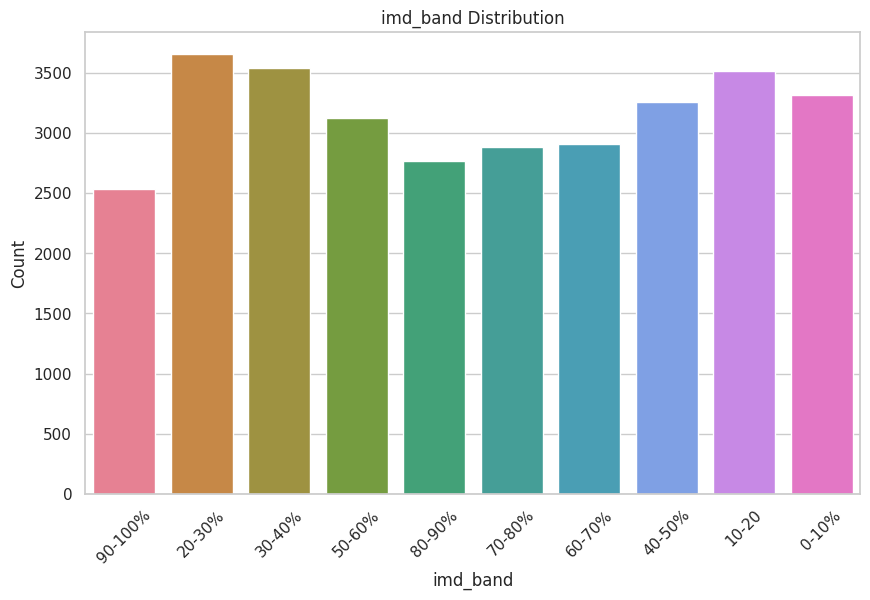

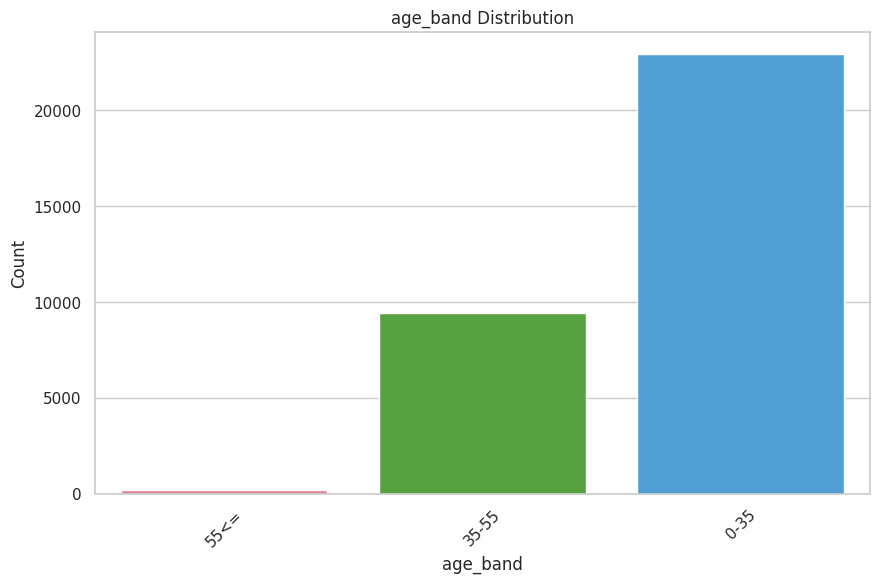

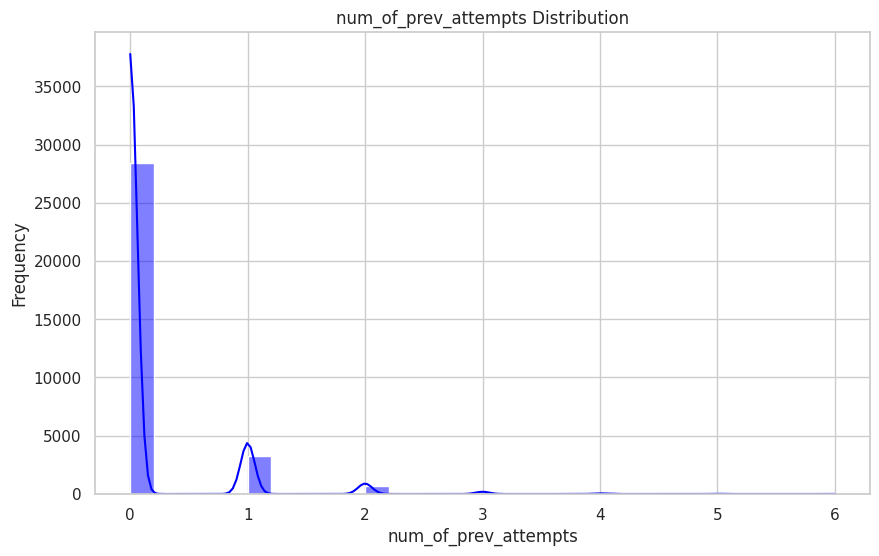

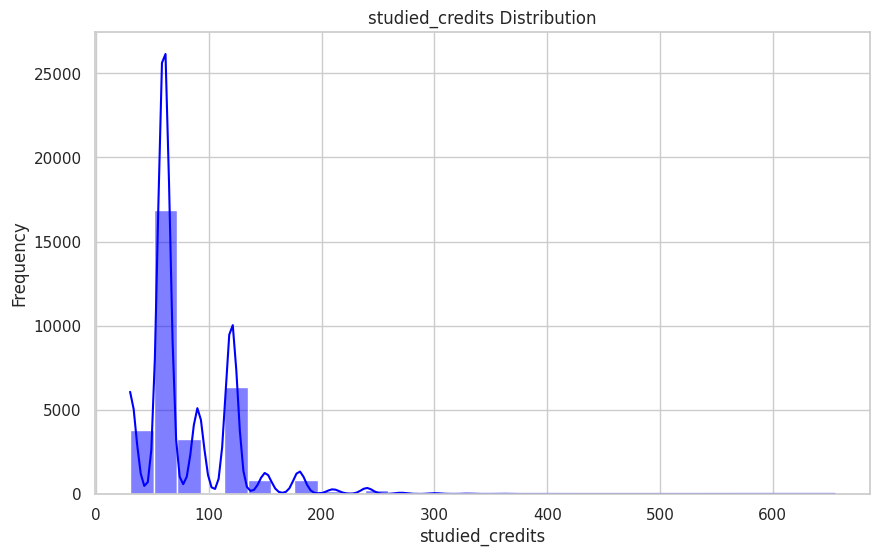

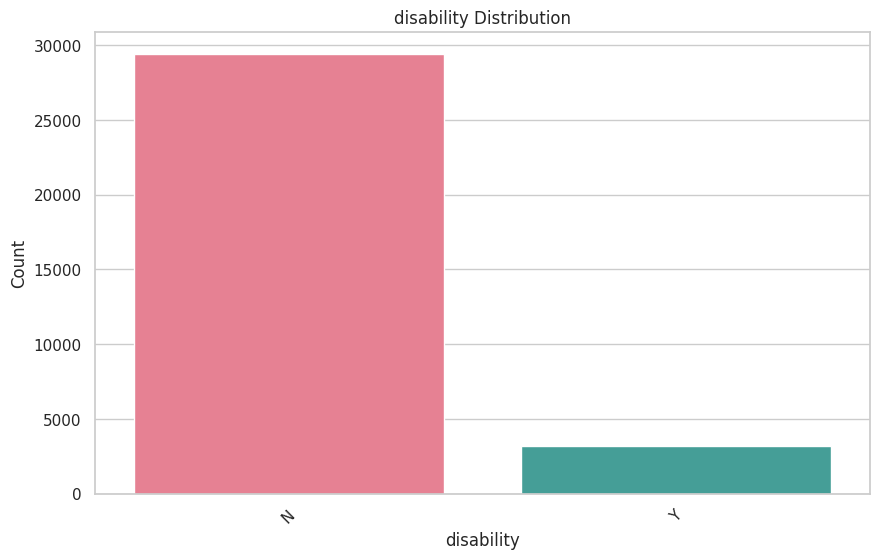

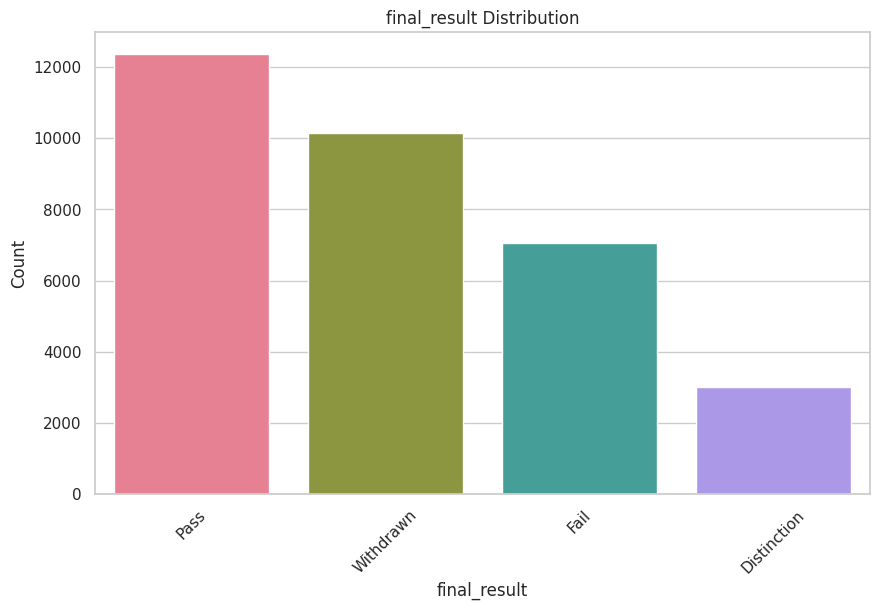

Table: StudentAssessment



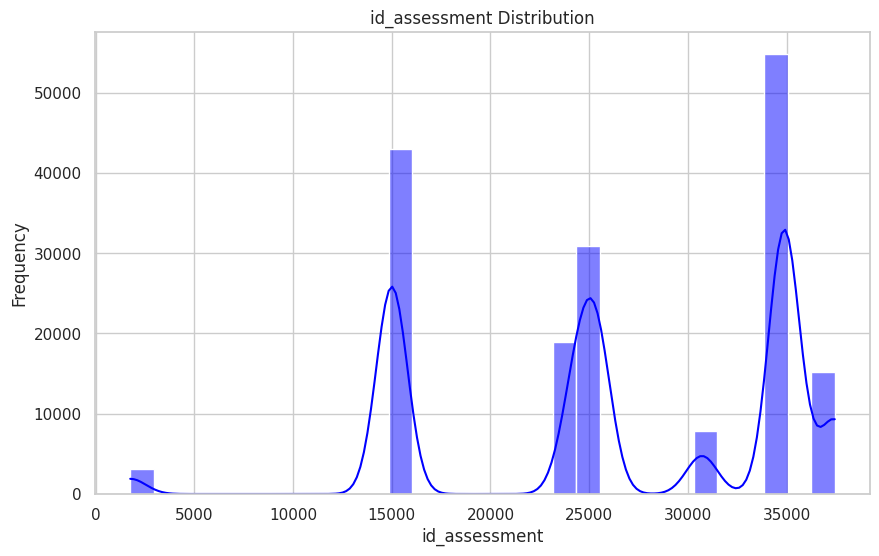

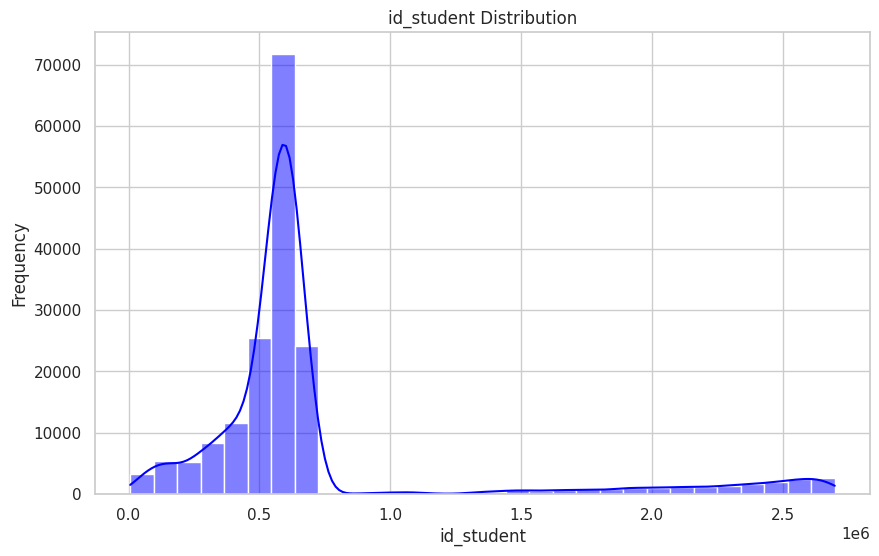

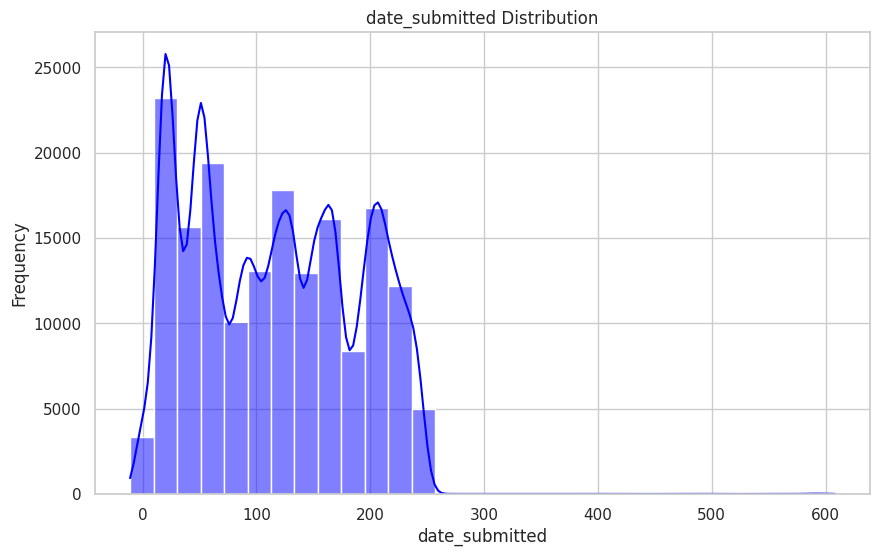

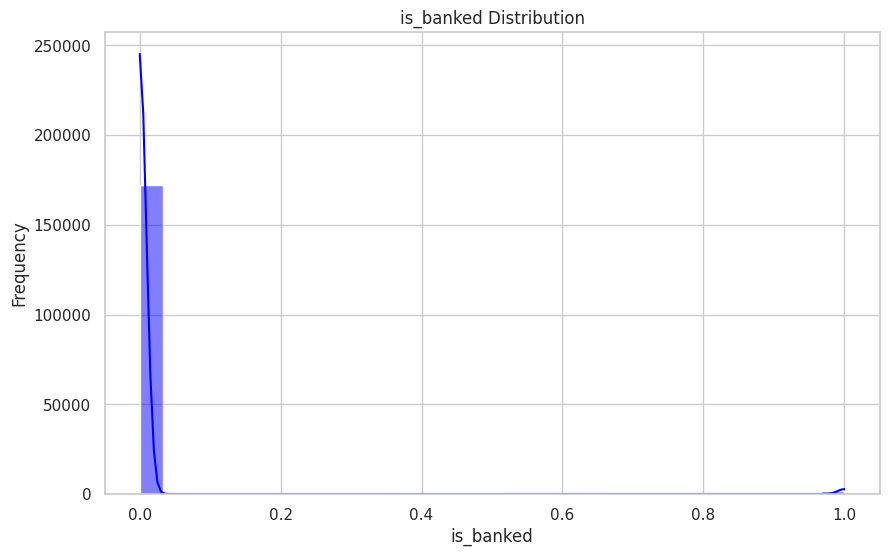

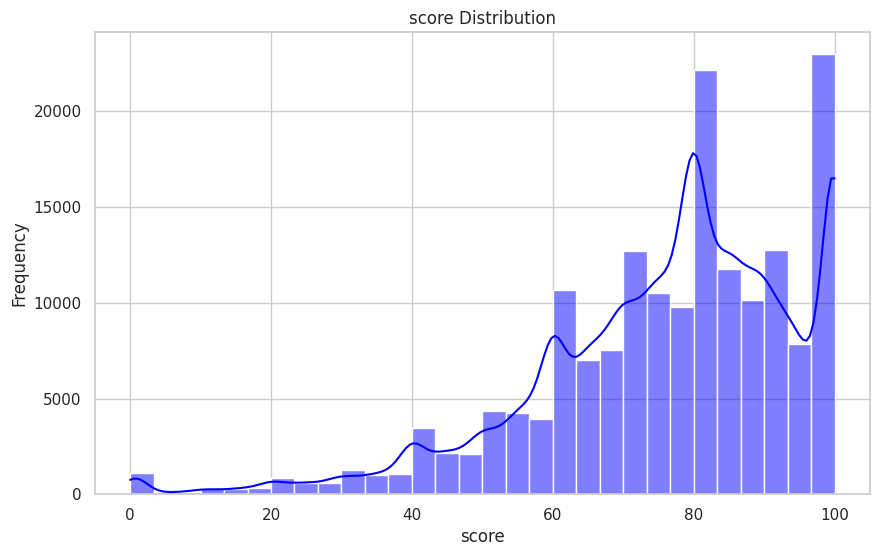

Table: StudentRegistration



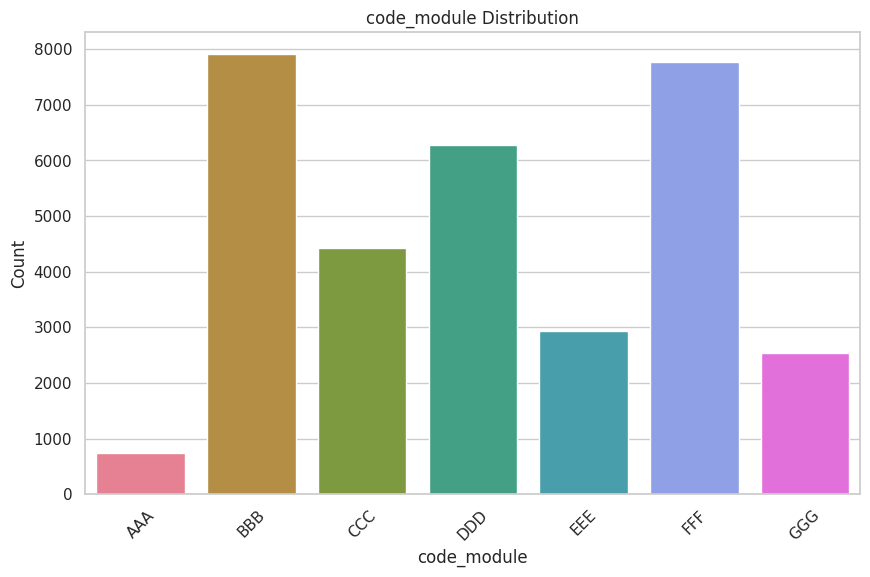

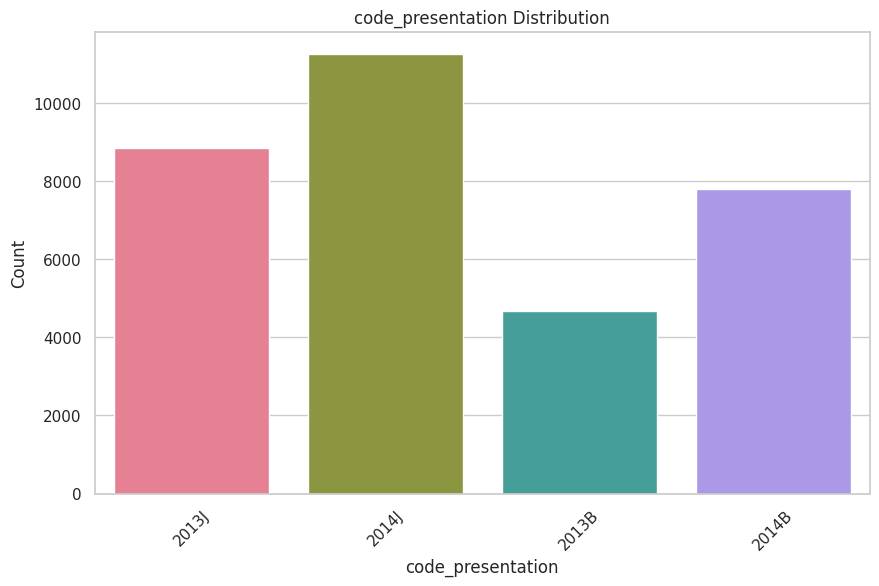

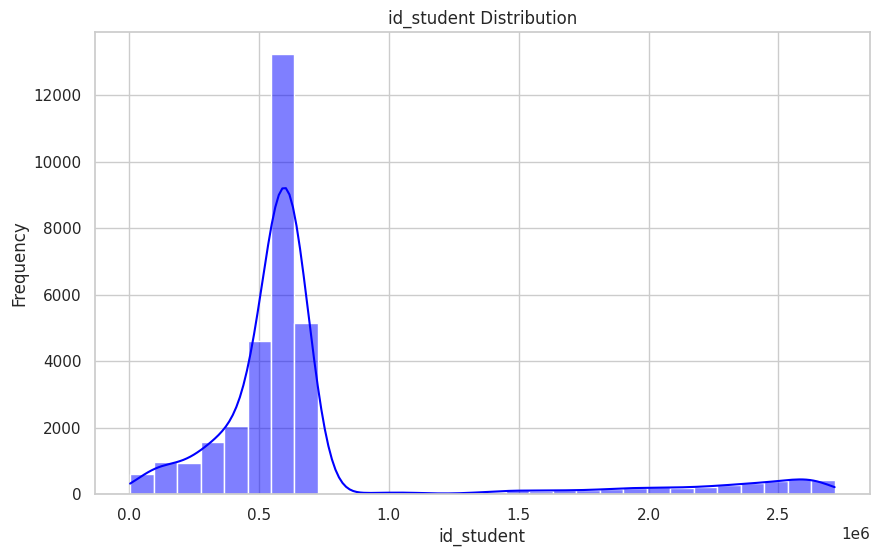

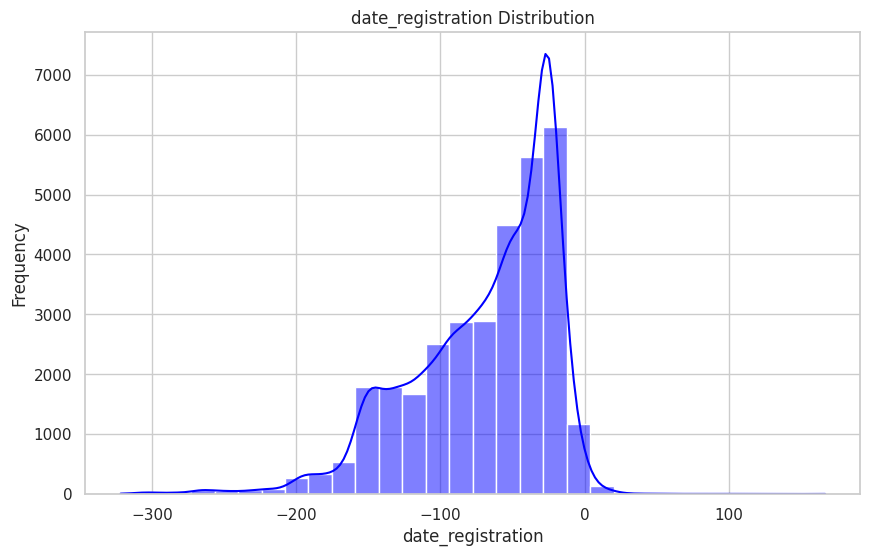

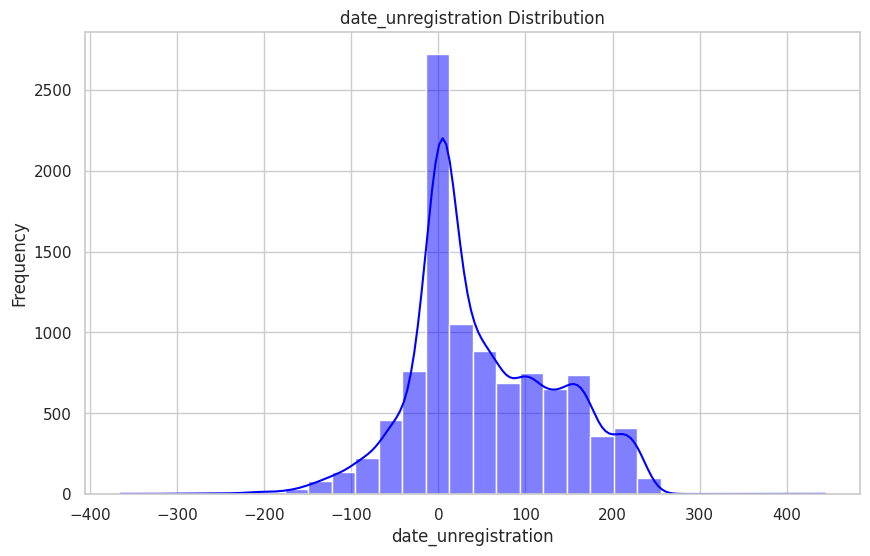

Table: StudentVle



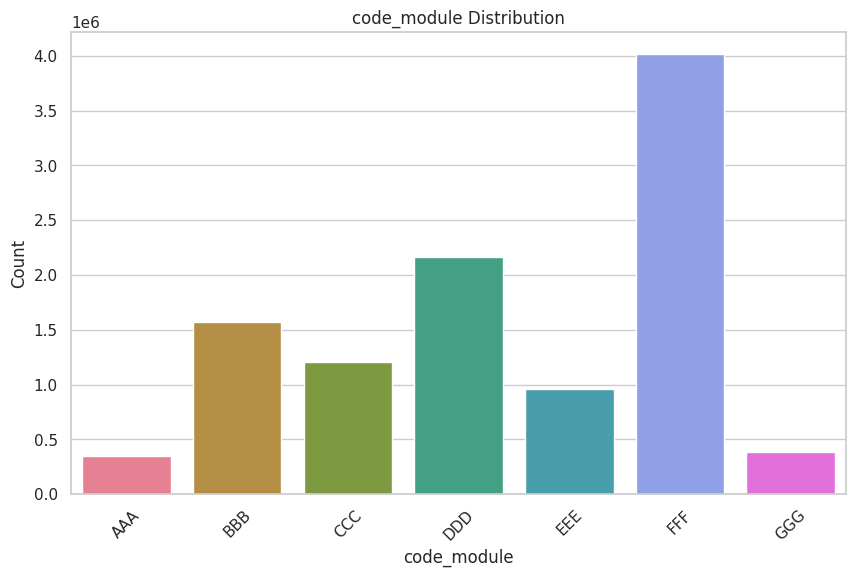

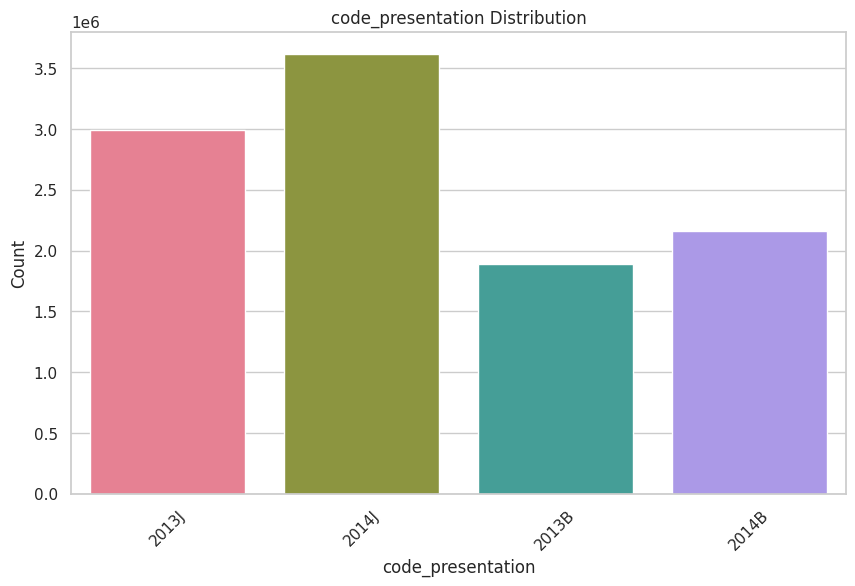

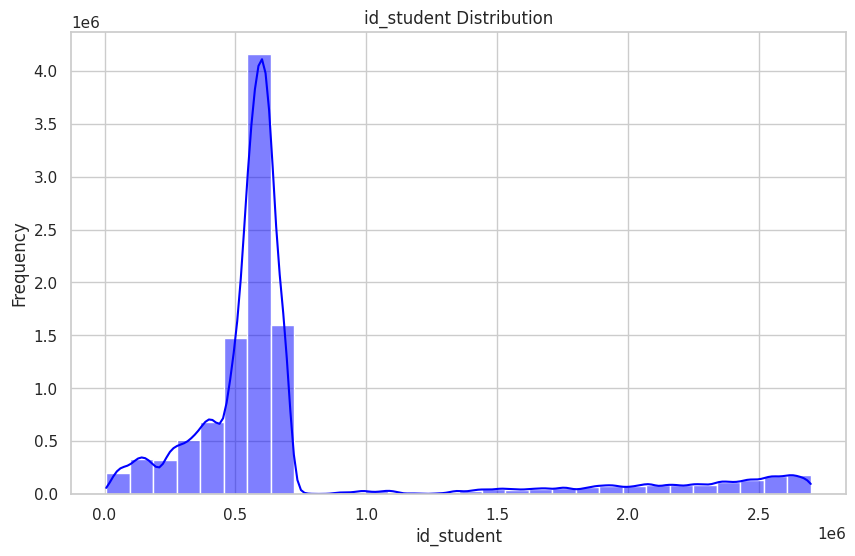

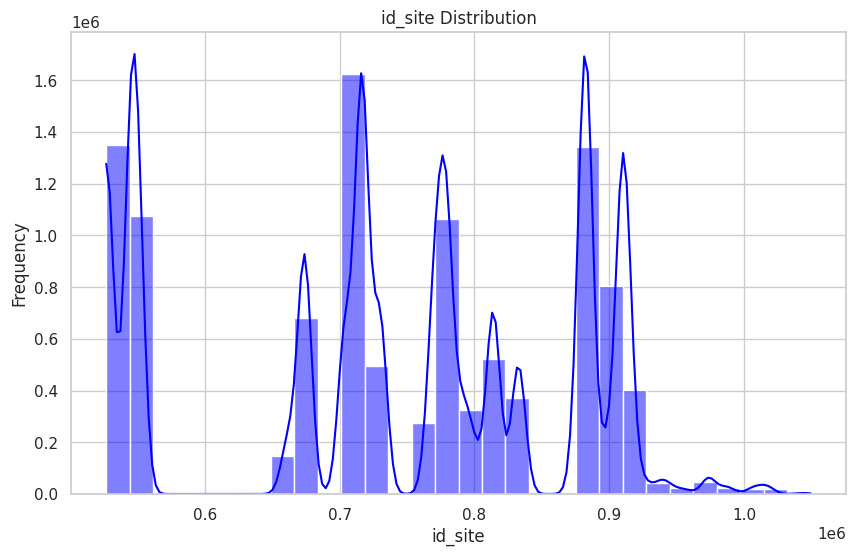

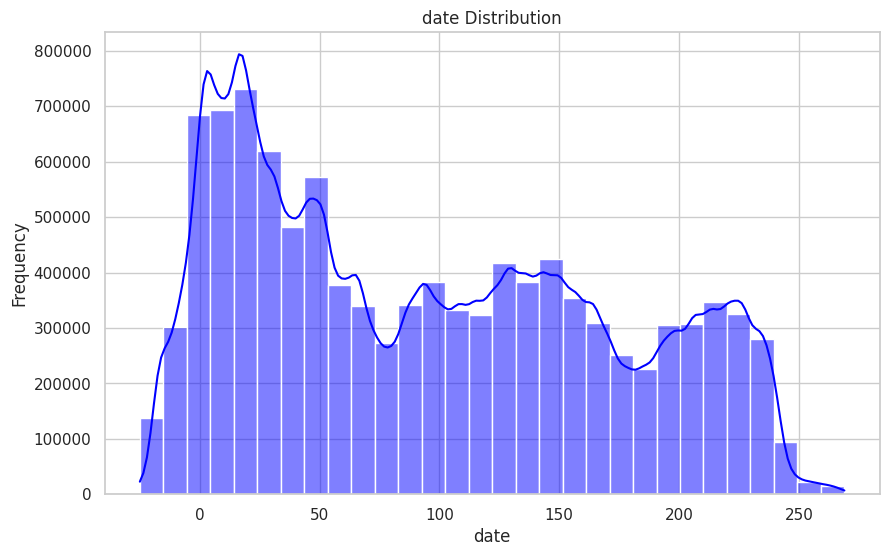

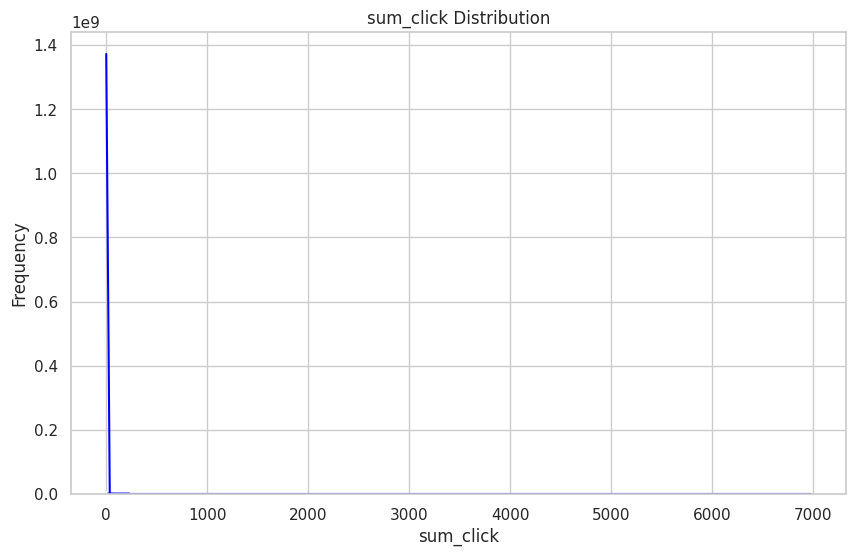

In [34]:
for table_name,data in University_Learning_Analytics_datasetData.items():
  print(f"Table: {table_name}")
  print()
  DistributionPlot(data)